In [69]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi



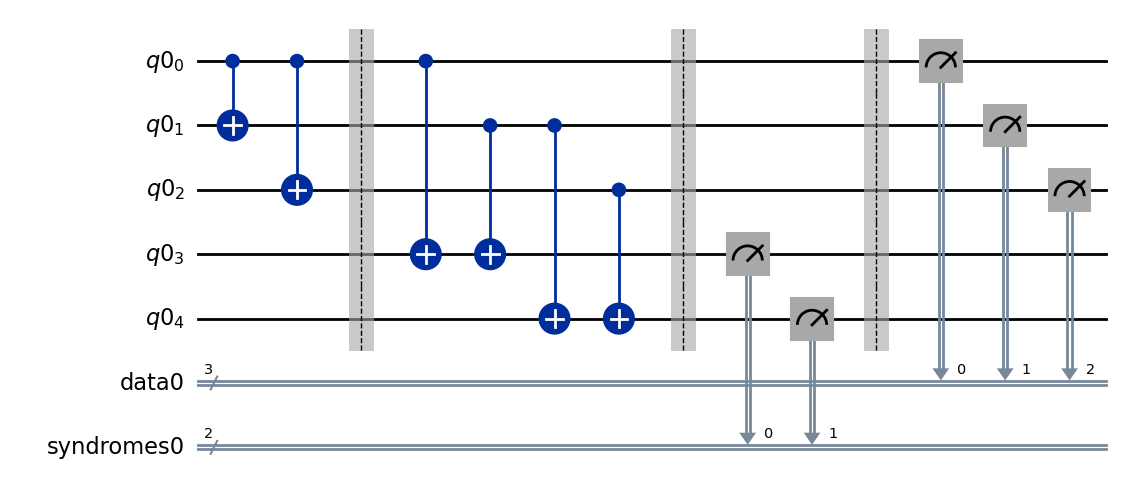

In [70]:


def gen_circuit(k=1, d=3, n_measure = 1):

    # qubits ordered by logical qubit
    qreg_q = [QuantumRegister(2*d-1, f"q{i}") for i in range(k)]

    # Data register ordered by logical qubit
    creg_data = [ClassicalRegister(d, f"data{i}") for i in range(k)]

    # Syndrome register ordered by logical qubit with capacity for multiple measurements
    creg_syndromes = [ClassicalRegister((d-1)*n_measure, f"syndromes{i}") for i in range(k)]
    
    circuit = QuantumCircuit(*qreg_q, *creg_data, *creg_syndromes)


    for i in range(k):

        # Entangle redundancy qubits
        for j in range(1,d):
            circuit.cx(qreg_q[i][0], qreg_q[i][j])

        # circuit.barrier(qreg_q[i][0], qreg_q[i][1], qreg_q[i][2], qreg_q[i][3], qreg_q[i][4])
        circuit.barrier([qreg_q[i][j] for j in range(2*d-1)])

        for m in range(n_measure):
            # Stabilizer computation
            for j in range(d-1):
                circuit.cx(qreg_q[i][j], qreg_q[i][d+j])
                circuit.cx(qreg_q[i][j+1], qreg_q[i][d+j])

            # circuit.barrier(qreg_q[i][0], qreg_q[i][1], qreg_q[i][2], qreg_q[i][3], qreg_q[i][4])
            circuit.barrier([qreg_q[i][j] for j in range(2*d-1)])

            # Measure syndrome
            for j in range(d-1):
                circuit.measure(qreg_q[i][j+d], creg_syndromes[i][j+(d-1)*m])

        
            circuit.barrier([qreg_q[i][j] for j in range(2*d-1)])

        for j in range(d):
            circuit.measure(qreg_q[i][j], creg_data[i][j])
        # circuit.measure(qreg_q[1], creg_data[1])
        # circuit.measure(qreg_q[2], creg_data[2])

    return circuit


circuit = gen_circuit(1,3, 1)

circuit.draw(output="mpl", style='iqp')

